# images.imutil

<a id='notes'></a>

## Notes

General fits image tools

Contents:

* [imcopy](#imcopy)
* [imheader](#imheader)
* [hselect](#hselect)
* [hedit](#hedit)
* [listpixels](#listpixels)
* [chpixtype](#chpixtype)
* [imstatistics](#imstatistics)
* [imarith/imdivide](#imarith)
* [imfunction/imexpr](#imfunction)
* [imhistogram](#imhistogram)
* [imreplace](#imreplace)
* [imsum](#imsum)
* [imstack](#imstack)
* [imslice](#imslice)

<br>

<a id='chpixtype'></a>

## chpixtype

** Please review the [Notes](#notes) section above before running any examples in this notebook **

Chpixtype is a task that allows you to change the pixel type of a fits image.  There is built in functionality in ``astropy.io.fits`` to preform this task with the ``scale`` method.  Below you will find a table that translates the chpixtype newpixtype options into their equivalent ``numpy``/``astropy`` type (http://docs.scipy.org/doc/numpy/user/basics.types.html).

**Type Conversions**

| Chpixtype  | Numpy/Astropy Type|
|:----------:|:-----------------:|
| ``ushort`` | ``uint16``        |
| ``short``  | ``int16``         |
| ``int``    | ``int32``         |
| ``long``   | ``int64``         |
| ``real``   | ``float32``       |
| ``double`` | ``float64``       |


In [16]:
# general imports
from astropy.io import fits

In [17]:
# Change this value to your desired data file, here were creating a filename
# for our new changed data
orig_data = '/eng/ssb/iraf_transition/test_data/iczgs3ygq_flt.fits'
new_data = '/eng/ssb/iraf_transition/test_data/iczgs3ygq_newdtype_flt.fits'

# Read in your fits file
hdu = fits.open(orig_data)

# Edit the datatype
hdu[1].scale(type='int32')

# Save changed hdu object to new file
# The clobber argument tells the writeto method to overwrite if file already exists
hdu.writeto(new_data, clobber=True)
hdu.close()

<br>

<a id='hedit'></a>

## hedit

** Please review the [Notes](#notes) section above before running any examples in this notebook **

The hedit task allows users to edit an image header.  This functioanlity is covered in ``astropy.io.fits``.  Take note that to make changes to a fits file, you must use the ``mode='update'`` keyword in the ``fits.open`` call.  Below you'll find examples of editing a keyword if it does/doesn't exist, and how to delete keywords from the header.

In [14]:
# general imports
from astropy.io import fits

In [15]:
# Change this value to your desired data file
test_data = '/eng/ssb/iraf_transition/test_data/iczgs3ygq_flt.fits'

# Open fits file, include the mode='update' keyword
hdu = fits.open(test_data, mode='update')

# Simple header change, will add keyword if it doesn't not exist
hdu[0].header['MYKEY1'] = 'Editing this keyword'

# Only add keyword if it does not already exist:
if 'MYKEY2' not in hdu[0].header:
    hdu[0].header['MYKEY2'] = 'Also editing this'

# To delete keywords, first check if they exist:
if 'MYKEY2' in hdu[0].header:
    del hdu[0].header['MYKEY2']
    
# Close fits file, this will save your changes
hdu.close()

<br>

<a id='hselect'></a>

## hselect

** Please review the [Notes](#notes) section above before running any examples in this notebook **

hselect is used to pull out specific header keywords.  You can also use specific keyword values to filter files.  We will be using the ????? package ``Hselect`` class.

In [29]:
"In progress..."

'In progress...'

<br>

<a id='imarith'></a>

## imarith / imdivide

** Please review the [Notes](#notes) section above before running any examples in this notebook **

Imarith and imdivide both provide functionality to apply basic operators to whole image arrays.  This task can be achieved with basic ``astropy.io.fits`` functionality along with ``numpy`` array functionality.

The basic operands (``+``,``-``,``/``,``*``) can all be used with an assignment operator in python (``+=``,``-=``,``/=``,``*=``).  See http://www.tutorialspoint.com/python/python_basic_operators.htm for more details

In [20]:
# general imports
from astropy.io import fits

In [62]:
# Basic operands (+,-,/,*)
# Change these values to your desired data files
test_data1 = '/eng/ssb/iraf_transition/test_data/iczgs3ygq_flt.fits'
test_data2 = '/eng/ssb/iraf_transition/test_data/iczgs3y5q_flt.fits'
output_data = '/eng/ssb/iraf_transition/test_data/imarith_out.fits'

# Open fits file
hdu1 = fits.open(test_data1)
hdu2 = fits.open(test_data2)

# Here we add hdu2-ext1 to hdu1-ext1 by using the shortcute += operator
hdu1[1].data += hdu2[1].data

# If you are dividing and need to avoid zeros in the image use indexing
indx_zeros = [hdu2[4].data == 0]
indx_nonzeros = [hdu2[4].data != 0]
# Set this value as you would the divzero parameter in imarith
set_zeros = 999.9
hdu1[4].data[indx_nonzeros] /= hdu2[4].data[indx_nonzeros]
hdu1[4].data[indx_zeros] = 999.9

# Save your new file
# The clobber argument tells the writeto method to overwrite if file already exists
hdu1.writeto(output_data, clobber=True)

# Close hdu files
hdu1.close()
hdu2.close()

<br>

<a id='imcopy'></a>

## imcopy

** Please review the [Notes](#notes) section above before running any examples in this notebook **

Imcopy allows users to copy a fits image to a new file. We can accomplish this using ``astropy.io.fits`` by saving our fits file to a new filename.

In [10]:
# general imports
from astropy.io import fits

In [11]:
# Change these values to your desired filenames
test_data = '/eng/ssb/iraf_transition/test_data/iczgs3ygq_flt.fits'
output_data = '/eng/ssb/iraf_transition/test_data/imcopy_out.fits'

hdu = fits.open(test_data)
# The clobber argument tells the writeto method to overwrite if file already exists
hdu.writeto(output_data, clobber=True)
hdu.close()

<br>

<a id='imfunction'></a>

## imfunction / imexpr

** Please review the [Notes](#notes) section above before running any examples in this notebook **

Imfunction will apply a function to the image pixel values in an image array.  Imexpr gives you similiar functionality with the added capability to combine different images using a user created expression.  We can accomplish this using the built in funcitonality of the ``numpy`` library (http://docs.scipy.org/doc/numpy/reference/routines.math.html)

If there is a particular function you would like to apply to your image array that you cannot find in the ``numpy`` library you can use the ``np.vectorize`` function, which can make any python function apply to each element of your array.  But keep in mind that ``np.vectorize`` is esentially looping over the array, and may not be the most efficient method (http://docs.scipy.org/doc/numpy/reference/generated/numpy.vectorize.html).

Example using exsisting numpy function:

In [23]:
# general imports
from astropy.io import fits
import numpy as np

In [22]:
# Change these values to your desired data files
test_data = '/eng/ssb/iraf_transition/test_data/iczgs3ygq_flt.fits'
output_data = '/eng/ssb/iraf_transition/test_data/imfunction_out.fits'

# Here we use the cosine function as an example
hdu = fits.open(test_data)
sci = hdu[1].data

# When you call your new function, make sure to reassign the array to
# the new values if the original function is not changing values in place
hdu[1].data = np.cos(hdu[1].data)

# Now save out to a new file, and close the original file, changes will
# not be applied to the oiginal fits file.
hdu.writeto(output_data)
hdu.close()

IOError: File '/eng/ssb/iraf_transition/test_data/imfunction_out.fits' already exists.

Example using user defined function and ``np.vectorize``:

In [4]:
# Change these values to your desired data files
test_data = '/eng/ssb/iraf_transition/test_data/iczgs3ygq_flt.fits'
output_data = '/eng/ssb/iraf_transition/test_data/imfunction2_out.fits'

# Here we use the following custom function as an example
def my_func(x):
    return (x**2)+(x**3)

# Now we open our file, and vectorize our function
hdu = fits.open(test_data)
sci = hdu[1].data
vcos = np.vectorize(my_func)

# When you call your new function, make sure to reassign the array to
# the new values if the original function is not changing values in place
hdu[1].data = vcos(hdu[1].data)

# Now save out to a new file, and close the original file, changes will
# not be applied to the oiginal fits file.
hdu.writeto(output_data)
hdu.close()

<br>

<a id='imheader'></a>

## imheader

** Please review the [Notes](#notes) section above before running any examples in this notebook **

The imheader task allows the user to list header parameters for a list of images.  Here we can use the ``astropy`` convenience function, ``fits.getheader()``

In [12]:
# general imports
from astropy.io import fits

# specific imports
import glob

In [13]:
# Change these values to your desired data files, glob will capture all wildcard matches
test_data = glob.glob('/eng/ssb/iraf_transition/test_data/iczgs3y*')

for filename in test_data:
    # Pull the header from extension 1
    head = fits.getheader(filename, ext=1)
    print repr(head)

XTENSION= 'IMAGE   '           / IMAGE extension                                
BITPIX  =                  -32                                                  
NAXIS   =                    2                                                  
NAXIS1  =                 1014                                                  
NAXIS2  =                 1014                                                  
PCOUNT  =                    0 / required keyword; must = 0                     
GCOUNT  =                    1 / required keyword; must = 1                     
ORIGIN  = 'HSTIO/CFITSIO March 2010'                                            
DATE    = '2016-06-02' / date this file was written (yyyy-mm-dd)                
INHERIT =                    T / inherit the primary header                     
EXTNAME = 'SCI     '           / extension name                                 
EXTVER  =                    1 / extension version number                       
ROOTNAME= 'iczgs3ygq        

<br>

<a id='imhistogram'></a>

## imhistogram

** Please review the [Notes](#notes) section above before running any examples in this notebook **

Imhistogram will plot a customized histogram of the provided image data. To make a histogram in Python we are going to use matplotlibs ``hist`` function.  See the ``hist`` documentation for options to change the histogram type, scaling, bin sizes, and more (http://matplotlib.org/api/pyplot_api.html)

In [24]:
# general imports
from astropy.io import fits
import numpy as np

# specific imports
import matplotlib.pyplot as plt

# Let's also make our plots show up in this notebook window
%matplotlib inline

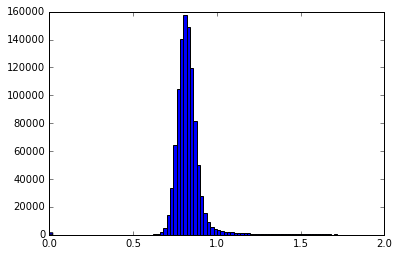

In [25]:
# Change these values to your desired data files
test_data = '/eng/ssb/iraf_transition/test_data/iczgs3ygq_flt.fits'

# Pull out the first science array, we also need to flatten the data before sending it to hist
sci1 = fits.getdata(test_data,ext=1)
sci1f = sci1.flatten()

# Now we can plot our histogram, using some of the optional keywords in hist
# The hist function returns the values of the histogram bins (n), the edges
# of the bins (obins), and the patches used to create the histogram
n, obins, patches = plt.hist(sci1f,bins=100,range=(0,2))

<br>

<a id='imreplace'></a>

## imreplace

** Please review the [Notes](#notes) section above before running any examples in this notebook **

We can use simple ``numpy`` array manipulation to replicate imreplace.  For details on how to grow the boolean array for replacement see crgrow, or the ``skimage.dilation`` documentation (http://scikit-image.org/docs/0.12.x/api/skimage.morphology.html?highlight=dilation#skimage.morphology.dilation).

In [26]:
# general imports
from astropy.io import fits
import numpy as np

In [27]:
# Change these values to your desired data files
test_data = '/eng/ssb/iraf_transition/test_data/iczgs3ygq_flt.fits'

# Pull out the first science array, make boolean mask with your requirements
hdu = fits.open(test_data)
sci1 = hdu[1].data
mask = np.logical_and(sci1>0.5, sci1<0.6)

# Use mask to replace values
new_value = 999
sci1[mask] = new_value

# We are not saving changes here
hdu.close()

<br>

<a id='imslice'></a>

## imslice

** Please review the [Notes](#notes) section above before running any examples in this notebook **

**Need a datacube image, also, see below note**

<br>

<a id='imcstack'></a>

## imstack

** Please review the [Notes](#notes) section above before running any examples in this notebook **

<br>

<a id='imstatistics'></a>

## imstatistics

** Please review the [Notes](#notes) section above before running any examples in this notebook **

**another good candidate for a command line wrapper**

We will use the ``astropy.stats.sigma_clipped_stats`` function here, which has some wider capabilites then the imstatistics function.  Please see the ``stats`` package documentation for details on the advanced usage (http://docs.astropy.org/en/stable/api/astropy.stats.sigma_clipped_stats.html).

In [18]:
# general imports
from astropy.io import fits

# specific imports
from astropy import stats

In [19]:
# Change these values to your desired data files
test_data = '/eng/ssb/iraf_transition/test_data/iczgs3ygq_flt.fits'
sci1 = fits.getdata(test_data,ext=1)

# The sigma_clipped_stats function returns the mean, median, and stddev respectively
output = stats.sigma_clipped_stats(sci1,sigma=2.0,iters=3)
print output

(0.82121155347072006, 0.81694626808166504, 0.058198063937460652)


<br>

<a id='imsum'></a>

## imsum

** Please review the [Notes](#notes) section above before running any examples in this notebook **

We will be using the ``ccdproc`` ``Combiner`` class here.  Keep in mind that the original fits header is not retained in the ``CCDData`` object.  Please see the documentation for more details (http://ccdproc.readthedocs.io/en/latest/ccdproc/image_combination.html).

In [18]:
# general imports
from astropy.io import fits
from astropy import units

# specific imports
from ccdproc import CCDData, Combiner

In [17]:
# Change these values to your desired data files
test_data1 = '/eng/ssb/iraf_transition/test_data/iczgs3y5q_flt.fits'
test_data2 = '/eng/ssb/iraf_transition/test_data/iczgs3ygq_flt.fits'

# First we need to pull out the science arrays to create CCDData objects
# Our acutal unit is electrons/sec, this is not accepted by the current
# set of units
cdata1 = CCDData.read(test_data1, hdu=1, unit=units.electron/units.s)
cdata2 = cdata1.copy()
cdata3 = CCDData.read(test_data2, hdu=1, unit=units.electron/units.s)
cdata4 = cdata3.copy()
combiner = Combiner([cdata1, cdata2, cdata3, cdata4])

# Now we can make our mask for extrema clipping
# The equivalent of low_reject, high_reject parameter
combiner.clip_extrema(nlow=1, nhigh=1)

# And finally to combine...
final_combine = combiner.average_combine()
print final_combine.data

INFO: using the unit electron / s passed to the FITS reader instead of the unit ELECTRONS/S in the FITS file. [ccdproc.ccddata]
INFO: using the unit electron / s passed to the FITS reader instead of the unit ELECTRONS/S in the FITS file. [ccdproc.ccddata]
[[  0.87720111   0.82106587   0.79521415 ...,   3.87308204   7.41545987
    9.01969481]
 [  0.89028609   0.7884455    0.8240625  ...,   0.86163342   4.53510189
    0.99109203]
 [  0.81683022   0.83273572   0.82175627 ...,   3.60699821  -7.82266164
    2.95994186]
 ..., 
 [ 40.72796059  15.36561799  -8.79329443 ...,  22.68277168  25.31048012
   28.829813  ]
 [ 46.28870392  -4.50218874   1.74757147 ...,  13.24364138  25.70440292
   11.0971849 ]
 [ 42.8106432   29.66250706  63.18441772 ...,   0.           9.80057049
   22.66858006]]


<br>

<a id='listpixels'></a>

## listpixels

** Please review the [Notes](#notes) section above before running any examples in this notebook **

**I know of at least one person who still uses this quite a bit, I think we should add this as a command line function**

<br>

## Not Replacing

* imrename 
* imdelete 
* imtile
* sections
* imgets - see **images.imutil.hselect**
* minmax - see **images.imutil.imstat**

<br>
### to-do
* Do we want to add "with fits.open" to some cells?
* what conclusion did we come to about imarith / imdivide exmaples?
* Add entry point examples here? Not sure...
* Add where example to imreplace (?)
* follow up on imslice/imstack
* What did we decide about imtile?